# Student Performance Factor Analysis

In [4]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
# load data
students = pd.read_csv("StudentPerformanceFactors.csv")
students.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [6]:
import pandas as pd

# Define the data
data = {
    'Variable': [
        'Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 
        'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 
        'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 
        'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 
        'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score'
    ],
    'Description': [
        'Number of hours spent studying per week.', 'Percentage of classes attended.', 
        'Level of parental involvement in the student\'s education (Low, Medium, High).', 
        'Availability of educational resources (Low, Medium, High).', 
        'Participation in extracurricular activities (Yes, No).', 
        'Average number of hours of sleep per night.', 'Scores from previous exams.', 
        'Student\'s level of motivation (Low, Medium, High).', 
        'Availability of internet access (Yes, No).', 
        'Number of tutoring sessions attended per month.', 
        'Family income level (Low, Medium, High).', 
        'Quality of the teachers (Low, Medium, High).', 
        'Type of school attended (Public, Private).', 
        'Influence of peers on academic performance (Positive, Neutral, Negative).', 
        'Average number of hours of physical activity per week.', 
        'Presence of learning disabilities (Yes, No).', 
        'Highest education level of parents (High School, College, Postgraduate).', 
        'Distance from home to school (Near, Moderate, Far).', 
        'Gender of the student (Male, Female).', 'Final exam score.'
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Apply left alignment to headers and remove index
styled_df = df.style.set_properties(**{'text-align': 'left'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}])

# Display DataFrame without index
display(styled_df.hide(axis='index'))


Variable,Description
Hours_Studied,Number of hours spent studying per week.
Attendance,Percentage of classes attended.
Parental_Involvement,"Level of parental involvement in the student's education (Low, Medium, High)."
Access_to_Resources,"Availability of educational resources (Low, Medium, High)."
Extracurricular_Activities,"Participation in extracurricular activities (Yes, No)."
Sleep_Hours,Average number of hours of sleep per night.
Previous_Scores,Scores from previous exams.
Motivation_Level,"Student's level of motivation (Low, Medium, High)."
Internet_Access,"Availability of internet access (Yes, No)."
Tutoring_Sessions,Number of tutoring sessions attended per month.


In [7]:
# delete rows with empty data
students = students.dropna().sort_values(by="Exam_Score",ascending=False)
students

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101
94,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100
3579,14,90,High,High,Yes,8,86,Medium,Yes,4,Medium,Medium,Private,Negative,2,No,High School,Near,Female,99
2425,23,83,High,High,Yes,4,89,Low,Yes,1,Medium,Medium,Public,Negative,3,No,High School,Far,Male,99
6393,16,83,Low,Medium,Yes,8,92,Low,Yes,2,High,High,Public,Positive,4,No,Postgraduate,Near,Female,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,14,67,Low,Low,Yes,7,66,Low,Yes,0,Low,Medium,Public,Neutral,4,No,High School,Far,Female,57
5719,9,64,Medium,Low,Yes,10,68,Low,Yes,0,Medium,Medium,Private,Negative,3,No,High School,Near,Male,57
2880,7,66,High,Low,Yes,8,68,High,Yes,0,Low,Medium,Public,Negative,2,Yes,College,Moderate,Male,57
5507,5,65,Low,High,No,7,71,Medium,Yes,0,Low,Medium,Private,Negative,2,No,College,Far,Male,56


In [8]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6378 entries, 1525 to 1101
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   o

In [9]:
students.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


##  Descriptive Statistics Analysis

### Question 1
What is the average exam score of students based on their access to resources?

In [10]:
# calculate and create a table containing average of exam scores based on access to resources
resources_scores = students.pivot_table(index="Access_to_Resources", values="Exam_Score",aggfunc="mean").sort_values(by="Exam_Score",ascending=False).rename(columns={"Exam_Score": "Average_Exam_Score"})

# display the table
resources_scores

,Average_Exam_Score
Access_to_Resources,
High,68.103158
Medium,67.156367
Low,66.223705


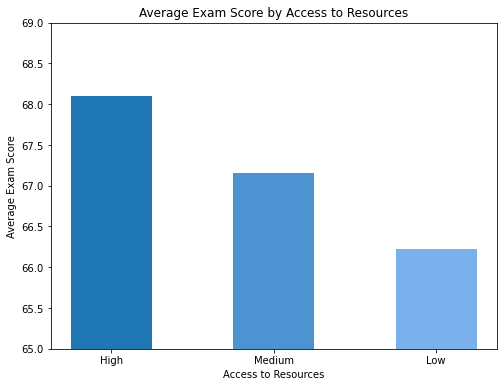

In [11]:
# create histogram
plt.figure(figsize=(8, 6))
plt.bar(resources_scores.index, resources_scores["Average_Exam_Score"], color=['#1f77b4', '#4d92d1', '#7ab0eb'], width=0.5)
plt.ylim(65, 69)
plt.title('Average Exam Score by Access to Resources')
plt.xlabel('Access to Resources')
plt.ylabel('Average Exam Score')

# display the chart
plt.show()

In [12]:
# display answer
for index, row in resources_scores.iterrows():
    print(f"Average exam score of students with {index} access to resources is {row['Average_Exam_Score']:.0f}")

Average exam score of students with High access to resources is 68
Average exam score of students with Medium access to resources is 67
Average exam score of students with Low access to resources is 66


### Question 2
Which type of school has the highest average exam score?

In [13]:
# calculate and create a table containing average of exam scores based on school type
school_scores = students.pivot_table(index="School_Type", values="Exam_Score",aggfunc="mean").rename(columns={"Exam_Score": "Average Exam Score"})

# display the table
school_scores

,Average Exam Score
School_Type,
Private,67.316358
Public,67.223951


In [14]:
# get the school type with the highest average of exam scores
highest_type = students.loc[students["Exam_Score"].idxmax(), "School_Type"]

# display the answer
print(f"The school type with the highest average score is {highest_type} School")

The school type with the highest average score is Public School


### Question 3
What is the percentage `Parental_Involvement` on students who improved their scores?

In [15]:
# get students who improved their scores
improved_score = students[students["Exam_Score"] > students["Previous_Scores"]][["Previous_Scores", "Exam_Score", "Parental_Involvement"]]

# display table of students who improved their scores
improved_score

,Previous_Scores,Exam_Score,Parental_Involvement
1525,93,101,Low
94,73,100,High
3579,86,99,High
2425,89,99,High
6393,92,98,Low
...,...,...,...
3357,51,58,High
4425,57,58,Medium
6431,55,58,Medium
3815,53,58,Low


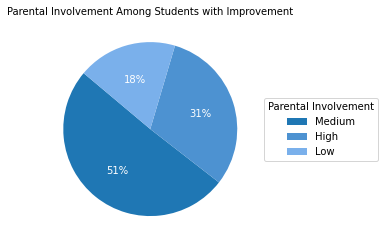

In [16]:
# get amount of students in each parental involvement level
parental_involvement_counts = improved_score['Parental_Involvement'].value_counts()

# create a pie chart
plt.figure(figsize=(4, 4))
colors = ['#1f77b4', '#4d92d1', '#7ab0eb']
wedges, texts, autotexts = plt.pie(parental_involvement_counts, autopct='%.0f%%', startangle=140, colors=colors, textprops={'fontsize': 10, 'color':'white'})
plt.title('Parental Involvement Among Students with Improvement', fontsize=10)
plt.legend(wedges, parental_involvement_counts.index, title="Parental Involvement", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# display the chart
plt.show()

In [17]:
# filter students with high parental involvement
p_high = (improved_score["Parental_Involvement"] =="High").sum()

# calculate percentage
percentage_p_high = p_high/len(improved_score) *100

# display answer
print(f"Percentage of high Parental_Involvement on students who improved their scores is {percentage_p_high:.0f}%.")

Percentage of high Parental_Involvement on students who improved their scores is 31%.


In [18]:
# filter students with medium parental involvement
p_medium = (improved_score["Parental_Involvement"] == "Medium").sum()

# calculate percentage
percentage_p_medium = p_medium/len(improved_score) *100

# display answer
print(f"Percentage of medium Parental_Involvement on students who improved their scores is {percentage_p_medium:.0f}%.")

Percentage of medium Parental_Involvement on students who improved their scores is 51%.


In [19]:
# filter students with low parental involvement
p_low = (improved_score["Parental_Involvement"] == "Low").sum() 

# calculate percentage
percentage_p_low = p_low/len(improved_score) *100

# display answer
print(f"Percentage of low Parental_Involvement on students who improved their scores is {percentage_p_low:.0f}%.")

Percentage of low Parental_Involvement on students who improved their scores is 18%.


### Question 4
What is the average score of students in the top 1%?

In [20]:
# get amount of students in the top 1%
top = int(len(students) * 0.01)

# get students in the top 1%
top_students = students.head(top)
top_students

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101
94,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100
3579,14,90,High,High,Yes,8,86,Medium,Yes,4,Medium,Medium,Private,Negative,2,No,High School,Near,Female,99
2425,23,83,High,High,Yes,4,89,Low,Yes,1,Medium,Medium,Public,Negative,3,No,High School,Far,Male,99
6393,16,83,Low,Medium,Yes,8,92,Low,Yes,2,High,High,Public,Positive,4,No,Postgraduate,Near,Female,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4728,30,98,Medium,High,Yes,7,96,Medium,Yes,1,Medium,Medium,Private,Neutral,3,No,Postgraduate,Near,Female,77
2544,35,77,High,High,Yes,8,89,Medium,Yes,5,High,Medium,Public,Positive,4,No,College,Near,Female,77
6566,29,96,High,Medium,No,8,85,Low,Yes,3,High,Medium,Public,Neutral,3,No,Postgraduate,Near,Male,76
4091,29,94,High,Medium,No,7,79,Medium,Yes,6,Low,High,Private,Neutral,4,No,College,Near,Female,76


In [21]:
# calculate average exam score of students in the top 1% 
top_average = round(top_students["Exam_Score"].mean())

# display answer
print(f"Average exam score of students in the top 1% is {top_average}.")

Average exam score of students in the top 1% is 87.


### Question 5
How much is the percentage of students in the top 1% based on their motivation level?

- Percentage of students in the top 1% with high motivation level 

In [22]:
# filter students with high motivation level
top_m_high = top_students["Motivation_Level"].value_counts()["High"]

# calculate percentage
percentage_m_high = top_m_high/len(top_students) *100

# display answer
print(f"Percentage of students in the top 1% with high motivation level is {percentage_m_high:.0f}%.")

Percentage of students in the top 1% with high motivation level is 27%.


- Percentage of students in the top 1% with medium motivation level 

In [23]:
# filter students with medium motivation level
top_m_medium = top_students["Motivation_Level"].value_counts()["Medium"]

# calculate percentage
percentage_m_medium = top_m_medium/len(top_students) *100

# display answer
print(f"Percentage of students in the top 1% with medium motivation level is {percentage_m_medium:.0f}%.")

Percentage of students in the top 1% with medium motivation level is 48%.


- Percentage of students in the top 1% with low motivation level 

In [24]:
# filter students with low motivation level
top_m_low = top_students["Motivation_Level"].value_counts()["Low"]

# calculate percentage
percentage_m_low = top_m_low/len(top_students) *100

# display answer
print(f"Percentage of students in the top 1% with low motivation level is {percentage_m_low:.0f}%.")

Percentage of students in the top 1% with low motivation level is 25%.


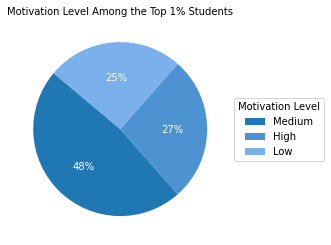

In [25]:
# get amount of students in the top 1% for each motivation level
motivation = top_students['Motivation_Level'].value_counts()

# create a pie chart
plt.figure(figsize=(4, 4))
wedges, texts, autotexts = plt.pie(motivation, autopct='%.0f%%', startangle=140, colors=colors, textprops={'fontsize': 10, 'color':'white'})
colors = ['#1f77b4', '#4d92d1', '#7ab0eb']
plt.title('Motivation Level Among the Top 1% Students', fontsize=10)
plt.legend(wedges, parental_involvement_counts.index, title="Motivation Level", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# display the chart
plt.show()

##  Discrete Variable Analysis


### Question 1
What is the probability of a student to be in the top 1% based on their family income?

- Probabilty of students with high family income to be in the top 1%

$$
\begin{align*}
P({T} \ | \ {H}) &= \cfrac{n({T} \cap {H})}{n({H})} \\ 
\end{align*}
$$

${T}$: Students in the top 1%  
${H}$ : All students with high family income 

<br>

In [26]:
# get students with high family income in the top 1%
top_high = top_students["Family_Income"].value_counts()["High"]

# get all students with high family income
high_income = students["Family_Income"].value_counts()["High"]

# probability of students with high family income to be in the top 1%
p_high_income = top_high / high_income

# print answer
print(f"Probabilty of students with high family income to be in the top 1% is {p_high_income:.4f}")

Probabilty of students with high family income to be in the top 1% is 0.0138


- Probabilty of students with medium family income to be in the top 1%

$$
\begin{align*}
P({T} \ | \ {M}) &= \cfrac{n({T} \cap {M})}{n({M})} \\ 
\end{align*}
$$

${T}$: Students in the top 1%  
${M}$ : All students with medium family income 


In [27]:
# get students with medium family income in the top 1%
top_medium = top_students["Family_Income"].value_counts()["Medium"]

# get all students with medium family income
medium_income = students["Family_Income"].value_counts()["Medium"]

# probability of students with medium family income to be in the top 1%
p_medium_income = top_medium / medium_income

# print answer
print(f"Probabilty of students with medium family income to be in the top 1% is {p_medium_income:.4f}")

Probabilty of students with medium family income to be in the top 1% is 0.0090


- Probabilty of students with low family income to be in the top 1%

$$
\begin{align*}
P({T} \ | \ {L}) &= \cfrac{n({T} \cap {L})}{n({L})} \\ 
\end{align*}
$$

${T}$: Students in the top 1%  
${L}$ : All students with low family income 


In [50]:
# get students with low family income in the top 1%
top_low = top_students["Family_Income"].value_counts()["Low"]

# get all students with low family income
low_income = students["Family_Income"].value_counts()["Low"]

# probability of students with low family income to be in the top 1%
p_low_income = top_low / low_income

# print answer
print(f"Probabilty of students with low family income to be in the top 1% is {p_low_income:.4f}")

Probabilty of students with low family income to be in the top 1% is 0.0089


### Question 2
How much is the probability of a student to be in the top 1% given that the school `Distance_from_Home` is `Near`?

In [49]:
top_near = top_students["Distance_from_Home"].value_counts()["Near"]

p_top_near = top_near / top

print(f"Probability of a student to be in the top 1% given that the school distance is near is {p_top_near:.2f}") 

Probability of a student to be in the top 1% given that the school distance is near is 0.60


### Question 3
How much is the probability of a student to be in the top 1% given that the student is a `Female`?

In [47]:
top_female = top_students["Gender"].value_counts()["Female"]

p_top_female = top_female / top

print(f"Probability of a student to be in the top 1% given that the student is a female is {p_top_female * 100:.0f}%") 

Probability of a student to be in the top 1% given that the student is a female is 49%


### Question 4
How much is the probability of a student to be in the top 1% given that the student is a `Male`?

In [48]:
top_male = (top_students["Gender"] == "Male").sum()

p_top_male = top_male / top

print(f"Probability of a student to be in the top 1% given that the student is a female is {p_top_male * 100:.0f}%") 

Probability of a student to be in the top 1% given that the student is a female is 51%


### Question 5
How is the distribution of the students' `Exam_Score`?

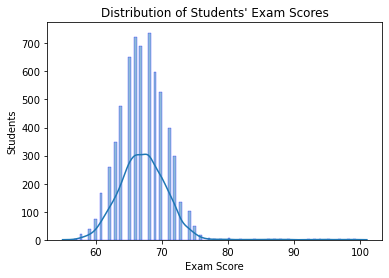

In [32]:
sns.histplot(students["Exam_Score"], edgecolor='blue',kde=True)
plt.xlabel('Exam Score')
plt.ylabel('Students')
plt.title("Distribution of Students' Exam Scores")
plt.show()

The graph shows a bell-shape curve which means that the data is normally distributed (**Normal Distribution**)

##  Continuous Variable Analysis

### Question 1
Which one is more likely to score at least 67, students studied at least 20 hours or less?

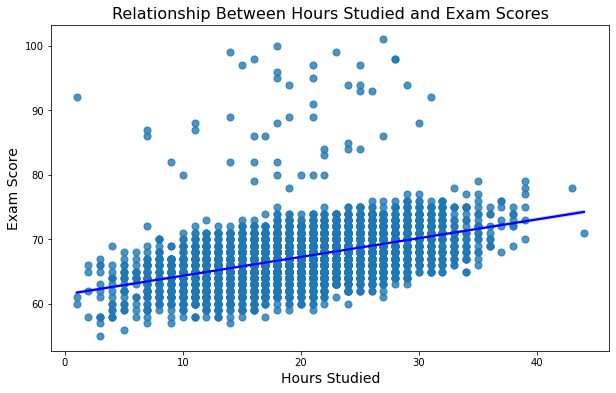

In [33]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Hours_Studied', y='Exam_Score', data=students, scatter_kws={'s': 50}, line_kws={'color': 'blue'})
plt.xlabel('Hours Studied', fontsize=14)
plt.ylabel('Exam Score', fontsize=14)
plt.title("Relationship Between Hours Studied and Exam Scores", fontsize=16)
plt.show()


In [34]:
# students who studied at least 20 hours
pass_studied_more = ((students["Hours_Studied"] >= 20) & (students["Exam_Score"] >= 67)) .sum()
studied_more = (students["Hours_Studied"] >= 20).sum()

p_pass_studied_more = pass_studied_more / studied_more
print(f"Probability of a student who studied at least 20 hours to score at least 67 is {p_pass_studied_more * 100 :.0f}%")

Probability of a student who studied at least 20 hours to score at least 67 is 71%


In [35]:
# students who studied less than 20 hours
pass_studied_less = ((students["Hours_Studied"] < 20) & (students["Exam_Score"] >= 67)).sum()
studied_less = (students["Hours_Studied"] < 20).sum()

p_pass_studied_less = pass_studied_less / studied_less
print(f"Probability of a student who studied less than 20 hours to score at least 67 is {p_pass_studied_less * 100 :.0f}%")

Probability of a student who studied less than 20 hours to score at least 67 is 40%


Therefore, students who studied at least 20 hours are more likely to score at least 67 compared to the one who studied less than 20 hours.

### Question 2
Which one is more likely to score at least 67, students who have at least 80% attendances or less?

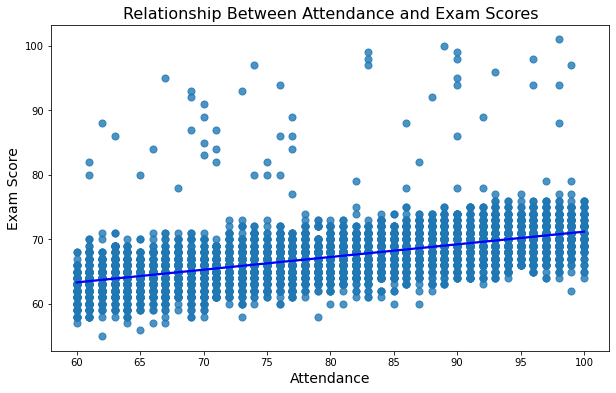

In [36]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Attendance', y='Exam_Score', data=students, scatter_kws={'s': 50}, line_kws={'color': 'blue'})
plt.xlabel('Attendance', fontsize=14)
plt.ylabel('Exam Score', fontsize=14)
plt.title("Relationship Between Attendance and Exam Scores", fontsize=16)
plt.show()

In [37]:
# students who have at least 80 attendances
pass_attend_more = ((students["Attendance"] >= 80) & (students["Exam_Score"] >= 67)).sum()
attend_more = (students["Attendance"] >= 80).sum()

p_pass_attend_more = pass_attend_more / attend_more
print(f"Probability of students who have at least 80% attendances to score at least 67 is {p_pass_attend_more * 100 :.0f}%")

Probability of students who have at least 80% attendances to score at least 67 is 82%


In [38]:
# students who have less than 80 attendances
pass_attend_less = ((students["Attendance"] < 80) & (students["Exam_Score"] >= 67)).sum()
attend_less = (students["Attendance"] < 80).sum()

p_pass_attend_less = pass_attend_less / attend_less
print(f"Probability of students who have less than 80% attendances to score at least 67 is {p_pass_attend_less * 100 :.0f}%")

Probability of students who have less than 80% attendances to score at least 67 is 30%


Therefore, students who have at least 80% attendances are more likely to score at least 67 compared to the one who have less than 80% attendances.

## Variable Correlation Analysis

Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). To answer correlation related question, a heatmap containing correlation coefficients between variables is created.

In [39]:
students

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101
94,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100
3579,14,90,High,High,Yes,8,86,Medium,Yes,4,Medium,Medium,Private,Negative,2,No,High School,Near,Female,99
2425,23,83,High,High,Yes,4,89,Low,Yes,1,Medium,Medium,Public,Negative,3,No,High School,Far,Male,99
6393,16,83,Low,Medium,Yes,8,92,Low,Yes,2,High,High,Public,Positive,4,No,Postgraduate,Near,Female,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,14,67,Low,Low,Yes,7,66,Low,Yes,0,Low,Medium,Public,Neutral,4,No,High School,Far,Female,57
5719,9,64,Medium,Low,Yes,10,68,Low,Yes,0,Medium,Medium,Private,Negative,3,No,High School,Near,Male,57
2880,7,66,High,Low,Yes,8,68,High,Yes,0,Low,Medium,Public,Negative,2,Yes,College,Moderate,Male,57
5507,5,65,Low,High,No,7,71,Medium,Yes,0,Low,Medium,Private,Negative,2,No,College,Far,Male,56


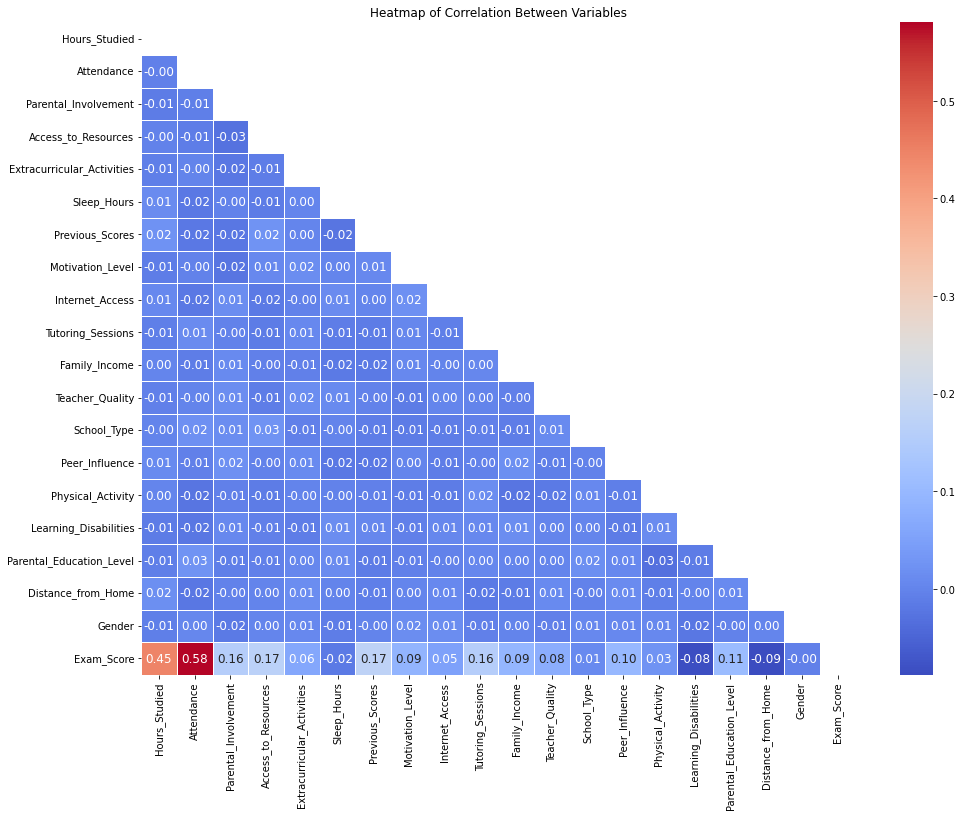

In [40]:
# encode binary variables
c_students = students.copy()
binary_map = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'Public': 0, 'Private': 1}
c_students['Internet_Access'] = c_students['Internet_Access'].map(binary_map)
c_students['Extracurricular_Activities'] = c_students['Extracurricular_Activities'].map(binary_map)
c_students['Learning_Disabilities'] = c_students['Learning_Disabilities'].map(binary_map)
c_students['Gender'] = c_students['Gender'].map(binary_map)
c_students['School_Type'] = c_students['School_Type'].map(binary_map)

# encode ordinal variables
ordinal_mappings = {
    'Motivation_Level': {'Low': 1, 'Medium': 2, 'High': 3},
    'Parental_Involvement': {'Low': 1, 'Medium': 2, 'High': 3},
    'Access_to_Resources': {'Low': 1, 'Medium': 2, 'High': 3},
    'Family_Income': {'Low': 1, 'Medium': 2, 'High': 3},
    'Teacher_Quality': {'Low': 1, 'Medium': 2, 'High': 3},
    'Peer_Influence': {'Negative': 1, 'Neutral': 2, 'Positive': 3},
    'Parental_Education_Level': {'High School': 1, 'College': 2, 'Postgraduate': 3},
    'Distance_from_Home': {'Near': 1, 'Moderate': 2, 'Far': 3}
}

c_students.replace(ordinal_mappings, inplace=True)

# create correlation matrix
numeric_columns = c_students.select_dtypes(include='number')
corr_matrix = numeric_columns.corr()

# display a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, mask=np.triu(np.ones_like(corr_matrix, dtype=bool)), annot=True, annot_kws={"size": 12}, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Heatmap of Correlation Between Variables')
plt.show()

### Question 1
How is the correlation between students' `Exam_Score` and `Sleep_Hours`?

From the graph above, correlation coefficient between students' `Exam_Score` and `Hours_Studied` is -0.02, which means that it has negative correlation where the more `Sleep_Hours`, the lower their `Exam_Score` is.

### Question 2
How is the correlation between students' `Exam_Score` and `Attendance`?

From the graph above, correlation coefficient between students' `Exam_Score` and `Attendance` is 0.58, which means that it has strong positive correlation where the more `Attendance`, the higher their `Exam_Score` is. From the graph, it is also shown that this variable has the highest correlation coefficient compared to the other factors.

##  Hypothesis Test


### Question 1
`Exam_Score` of students with high `Access to Resources` is higher than other students' `Exam_Score`.

Given $\bar{x_h}$ is the average `Exam_Score` of students with `high` `Access to Resources` and $\bar{x_o}$ is the average `Exam_Score` of the rest of the students, then hypothesis of this question is:

$$H_0: \bar{x_h} \leq \bar{x_o} $$ 
$$H_1: \bar{x_h} > \bar{x_o}$$

To do this hypothesis test, we will use a z-test with formula below.

$$ z = \frac{{\bar{x_h} - \bar{x_o}}}{{\sigma \times \sqrt{\frac{1}{n_h} + \frac{1}{n_o}}}} $$

$\sigma$ = Population standard deviation  
${n_h}$  = Students with high access to resources  
${n_o}$  = Students with high access to resources  

In [42]:
from scipy.stats import norm

# get students with 'High' access to resources
high_access = students[students['Access_to_Resources'] == 'High']['Exam_Score']
n_high_access = len(high_access)

# get the average exam score
m_high_access = high_access.mean()

# get students with 'Medium' or 'Low' access to resources
other_access = students[students['Access_to_Resources'] != 'High']['Exam_Score']
n_other_access = len(other_access)

# get the average exam score
m_other_access = other_access.mean()

# known population standard deviation
population_std = 3.914217

# set a significance level
significance_level = 0.05

# conducting z-test
z_test = (m_high_access - m_other_access) / (population_std * np.sqrt(1/n_high_access + 1/n_other_access))
p_value = 1 - norm.cdf(z_test)

# print the results
print(f"z-test: {z_test}, p-value: {p_value}")
print("-"*100)

# decide results
if p_value < significance_level:
    print("Reject the null hypothesis")
    print("Conclusion: Students with high access to resources have higher exam scores.")
else:
    print("Fail to reject the null hypothesis") 
    print("Conclusion: No evidence that students with high access to resources have higher exam scores.")


z-test: 11.310523910240724, p-value: 0.0
----------------------------------------------------------------------------------------------------
Reject the null hypothesis
Conclusion: Students with high access to resources have higher exam scores.


### Question 2

In the top 1%, proportion of `Female` students is higher than `Male` students.

Hypothesis of this question is:  
$H_0$: Proportion of `Female` students is less than equal to `Male` students   
$H_1$: Proportion of `Female` students is higher than `Male` students  

To this hypothesis test we will z-test for proportions using formula below
$$ z = \frac{{p_f}-{p}_m}{\sqrt{\frac{p_f(1-p_f)}{n}}} $$


In [43]:
from statsmodels.stats.proportion import proportions_ztest

# get each female students in the top 1%
top_female = (top_students["Gender"] == "Female").sum()

# get male students in the top 1%
top_male = (top_students["Gender"] == "Male").sum()

# get total number of female students
total_female = (students["Gender"] == "Female").sum()

# get total number of male students
total_male = (students["Gender"] == "Male").sum()

# set a significance level
significance_level = 0.05

# conducting a z-test for proportions
count = [top_female, top_male]
nobs = [total_female , total_male]

z_test, p_value = proportions_ztest(count, nobs, alternative='larger')

# print results
print(f"z-test: {z_test}, p-value: {p_value}")
print("-"*100)

# decide results
if p_value < significance_level:
    print("Reject the null hypothesis")
    print("Conclusion: The proportion of female students in the top 1% is higher than male students.")
else:
    print("Fail to reject the null hypothesis")
    print("Conclusion: No evidence that the proportion of female students in the top 1% is higher.")


z-test: 1.135537324050456, p-value: 0.12807512631819573
----------------------------------------------------------------------------------------------------
Fail to reject the null hypothesis
Conclusion: No evidence that the proportion of female students in the top 1% is higher.
